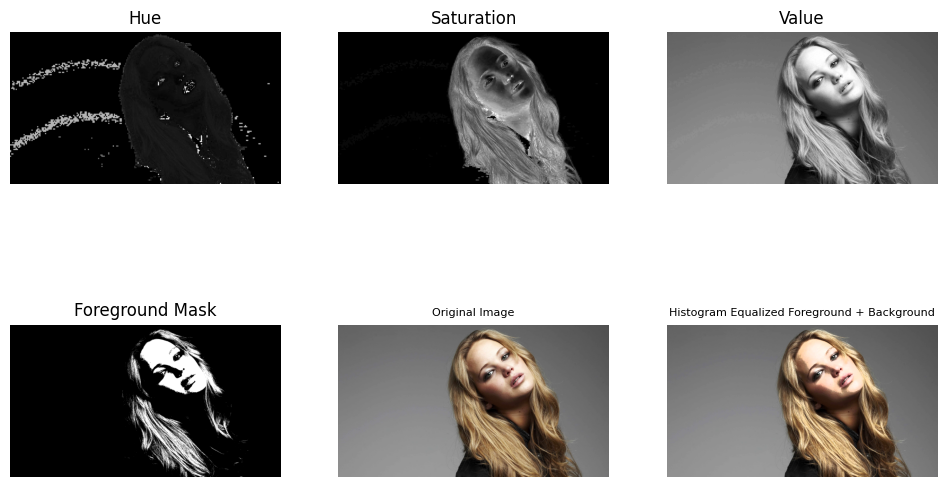

In [1]:
#q6

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im6 = cv.imread('images/jeniffer.jpg',cv.IMREAD_ANYCOLOR)
imp =cv.cvtColor(im6, cv.COLOR_BGR2RGB)
img_n = cv.cvtColor(im6, cv.COLOR_BGR2HSV)
h,s,v = cv.split(img_n)



# Choose an appropriate threshold value
threshold_value = 170

# thresholding to the value channel
ret, foreground_mask = cv.threshold(v, threshold_value, 220, cv.THRESH_BINARY)

# Obtain the foreground 
foreground = cv.bitwise_and(v, v, mask=foreground_mask)

# Calculate histogram equalization values
hist_foreground, _ = np.histogram(foreground, bins=256, range=(0, 256))
cumulative_sum = np.cumsum(hist_foreground)
equalized_values = ((cumulative_sum - cumulative_sum.min()) * 255) / (cumulative_sum.max() - cumulative_sum.min())
equalized_foreground = np.interp(foreground, np.arange(0, 256), equalized_values).astype(np.uint8)

# Extract background by inverting the foreground mask
background_mask = cv.bitwise_not(foreground_mask)
background = cv.bitwise_and(v, v, mask=background_mask)


result_value = cv.add(equalized_foreground, background)  

#merge the channels
result_hsv = cv.merge([h, s, result_value])


result_image = cv.cvtColor(result_hsv, cv.COLOR_HSV2BGR)
result_image = cv.cvtColor(result_image,cv.COLOR_BGR2RGB)

f, a = plt.subplots(2,3, figsize =(10,6))
f.tight_layout()

a[0,0].imshow(h, cmap='gray')
a[0,0].set_title('Hue')
a[0,0].axis('off')

a[0,1].imshow(s, cmap='gray')
a[0,1].set_title('Saturation')
a[0,1].axis('off')

a[0,2].imshow(v, cmap='gray')
a[0,2].set_title('Value')
a[0,2].axis('off')

a[1,0].imshow(foreground_mask,cmap='gray')
a[1,0].set_title('Foreground Mask')
a[1,0].axis('off')

a[1,2].imshow(result_image)
a[1,2].set_title('Histogram Equalized Foreground + Background', fontsize=8)
a[1,2].axis('off')

a[1,1].imshow(imp)
a[1,1].set_title('Original Image',fontsize=8)
a[1,1].axis('off')

plt.show()



